## **The Setting Up**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

train = pd.read_csv("train.csv")
train.drop(columns = ["dates"], inplace = True, axis = 1)
testing = pd.read_csv("test.csv")
df = pd.read_csv("BTC-USD.csv")
train

#Factor F -> Most probably VOLUMES

,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N,TGD Consultancy Share price,TGD Automobiles Share price,TGD Power Share price
0,502.52,498.78,493.98,947.6,505.24,79050.0,502.10,502.73,630.41,496.60,508.95,512.01,499.20,501.94,519.0,420.0,507.0
1,503.33,495.09,496.93,928.6,506.21,31082.0,502.28,501.96,630.61,496.76,508.97,512.45,500.14,501.51,518.0,420.0,507.0
2,500.62,493.71,504.75,935.5,505.51,19375.0,502.09,499.17,630.81,496.91,508.99,513.31,499.96,501.00,523.0,437.0,522.0
3,502.08,492.98,502.20,923.5,505.25,22010.0,501.88,500.43,631.01,497.06,509.01,513.49,500.05,501.04,522.0,437.0,522.0
4,502.81,493.23,499.57,918.1,504.86,26533.0,501.70,501.46,631.21,497.21,509.03,513.59,500.31,501.10,522.0,437.0,522.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161763,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,498.0,420.0,507.0
161764,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,502.0,420.0,507.0
161765,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,508.0,420.0,507.0
161766,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,507.0,420.0,507.0


### **Features DataFrame**

In [ ]:
features = train.drop(columns = ["TGD Consultancy Share price", "TGD Automobiles Share price", "TGD Power Share price"], axis = 1)
features = features.to_numpy()
features

array([[  502.52,   498.78,   493.98, ...,   512.01,   499.2 ,   501.94],
       [  503.33,   495.09,   496.93, ...,   512.45,   500.14,   501.51],
       [  500.62,   493.71,   504.75, ...,   513.31,   499.96,   501.  ],
       ...,
       [10499.99, 10499.99, 10499.99, ..., 10499.99, 10499.99, 10499.99],
       [10499.99, 10499.99, 10499.99, ..., 10499.99, 10499.99, 10499.99],
       [10499.99, 10499.99, 10499.99, ..., 10499.99, 10499.99, 10499.99]])

### **Targets**

In [ ]:
target = train[["TGD Consultancy Share price", "TGD Automobiles Share price", "TGD Power Share price"]]
target = target.to_numpy()
print(target)
consul = target[:, 0]
auto = target[:, 1]
power = target[:, 2]
print(consul)

[[519. 420. 507.]
 [518. 420. 507.]
 [523. 437. 522.]
 ...
 [508. 420. 507.]
 [507. 420. 507.]
 [499. 420. 507.]]
[519. 518. 523. ... 508. 507. 499.]


## **Sequential Model**

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape = (14, ), activation = "linear"))

model.compile(loss = "mse", optimizer = "adam", metrics = ["mae"])
history = model.fit(features, consul, batch_size = 32, epochs = 100, validation_data = (features, consul))
test_loss, test_mae = model.evaluate(features, consul)

Epoch 1/100
5056/5056 [==============================] - 20s 4ms/step - loss: 65594298368.0000 - mae: 30102.4785 - val_loss: 21943796.0000 - val_mae: 3117.6562
Epoch 2/100
5056/5056 [==============================] - 19s 4ms/step - loss: 9277739.0000 - mae: 1771.8094 - val_loss: 496257.3125 - val_mae: 341.5976
Epoch 3/100
5056/5056 [==============================] - 18s 4ms/step - loss: 315567.3750 - mae: 190.6971 - val_loss: 75479.8516 - val_mae: 90.8694
Epoch 4/100
5056/5056 [==============================] - 18s 4ms/step - loss: 556924.6875 - mae: 126.9680 - val_loss: 36687.1875 - val_mae: 80.8977
Epoch 5/100
5056/5056 [==============================] - 19s 4ms/step - loss: 212762.7031 - mae: 82.2480 - val_loss: 17427.7207 - val_mae: 56.9141
Epoch 6/100
5056/5056 [==============================] - 14s 3ms/step - loss: 264758.7188 - mae: 73.6811 - val_loss: 1847.4258 - val_mae: 26.9438
Epoch 7/100
5056/5056 [==============================] - 13s 3ms/step - loss: 371066.1562 - mae: 71

In [ ]:
model.layers[0].weights

[<tf.Variable 'dense_1/kernel:0' shape=(14, 1) dtype=float32, numpy=
 array([[ 1.8425053e-01],
        [-2.7889353e-03],
        [ 2.5527823e-01],
        [-1.7407632e-02],
        [ 6.2402081e-01],
        [-5.1219191e-05],
        [ 3.4917164e-01],
        [-1.6837765e-02],
        [-6.1093658e-02],
        [ 1.4051086e-01],
        [ 2.6643597e-02],
        [-7.7480391e-02],
        [ 5.2235629e-03],
        [-3.0684316e-01]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.3548912], dtype=float32)>]

In [ ]:
display(testing)
testing.drop(columns = ["dates"], axis = 1, inplace = True)
testing = testing.to_numpy()
print(testing)

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N
0,2142-11-28,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
1,2142-11-29,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
2,2142-11-30,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
3,2142-12-01,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
4,2142-12-02,503.94,497.55,499.63,894.7,502.82,94705.0,500.88,499.93,736.35,596.33,498.68,514.90,499.69,500.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2225-01-12,500.82,506.68,500.90,893.7,504.21,233367.0,501.30,499.24,736.27,586.38,507.95,514.26,496.98,500.78
29996,2225-01-13,499.46,503.79,505.45,913.4,504.21,180508.0,501.44,497.56,736.31,586.31,507.96,514.11,498.10,501.06
29997,2225-01-14,501.84,504.53,505.15,903.9,503.90,193973.0,501.27,497.46,736.38,586.23,507.98,514.49,497.65,500.21
29998,2225-01-15,496.40,505.25,500.41,929.0,503.16,167564.0,501.16,499.57,736.41,586.19,507.98,514.53,498.27,501.61


[[10499.99 10499.99 10499.99 ... 10499.99 10499.99 10499.99]
 [10499.99 10499.99 10499.99 ... 10499.99 10499.99 10499.99]
 [10499.99 10499.99 10499.99 ... 10499.99 10499.99 10499.99]
 ...
 [  501.84   504.53   505.15 ...   514.49   497.65   500.21]
 [  496.4    505.25   500.41 ...   514.53   498.27   501.61]
 [  496.94   506.88   495.79 ...   513.87   498.56   501.32]]


In [ ]:
y_model = model.predict(testing)
y_model

938/938 [==============================] - 1s 1ms/step


array([[577.7951],
       [577.7951],
       [577.7951],
       ...,
       [535.9618],
       [533.6906],
       [534.2224]], dtype=float32)

In [ ]:
regModel = LinearRegression(fit_intercept = True)
regModel.fit(features, consul)
y_model = regModel.predict(testing)
y_model

array([511.50642871, 511.50642871, 511.50642871, ..., 508.34586616,
       508.38211539, 509.15862322])

### **The Plot**

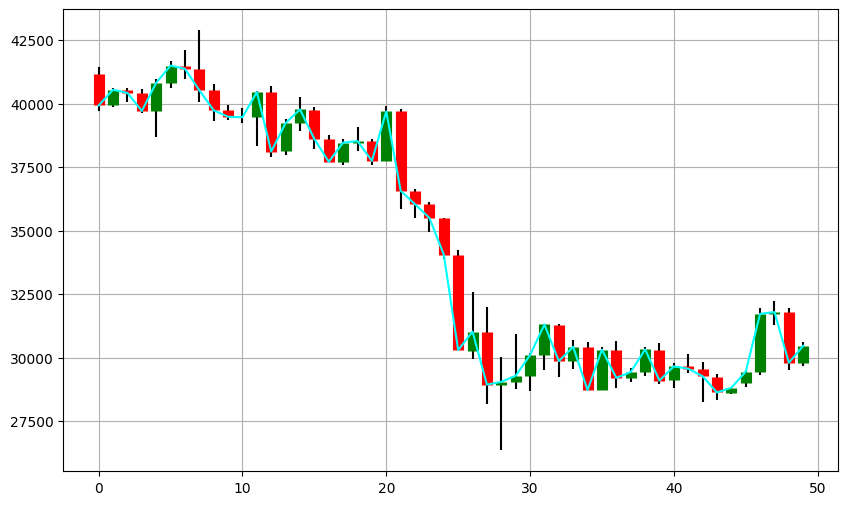

In [ ]:
plt.figure(figsize = (10, 6))
for i in range(len(df["Close"][:50])):
  plt.vlines(x = i, ymax = df["High"][i], ymin = df["Low"][i], color = "black")
  if df["Open"][i] <= df["Close"][i]:
    plt.vlines(x = i, ymax = df["Close"][i], ymin = df["Open"][i], color = "green", linewidth = 8)
  else:
    plt.vlines(x = i, ymax = df["Open"][i], ymin = df["Close"][i], color = "red", linewidth = 8)
plt.plot(df["Close"][:50], color = "cyan")
plt.grid()
plt.show()

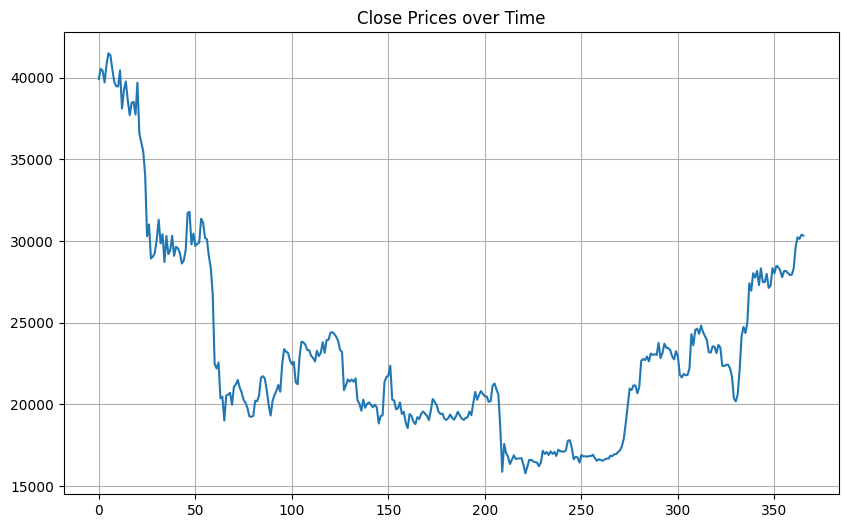

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(df["Close"])
plt.grid()
plt.title("Close Prices over Time")
plt.show()

In [ ]:
means = []
for i in range(len(df["Close"])):
  means.append(df["Close"][:i+1].mean())
print(means)

[39935.515625, 40244.4902345, 40304.48828133333, 40157.60449225, 40291.3265626, 40493.23046883333, 40619.108817, 40607.640625, 40511.27170144444, 40408.8175782, 40323.40625009091, 40334.648112083334, 40164.095252538464, 40098.16852692857, 40076.54583346667, 39984.875732562505, 39851.34627770589, 39774.55447061112, 39709.016241894744, 39611.088086050004, 39615.24441976191, 39477.05788363637, 39327.660665869575, 39168.256185, 38963.8965626, 38630.55258423077, 38348.787905185185, 38012.629603892856, 37703.4958917931, 37422.816145933335, 37186.63709687097, 37002.839477625, 36786.47821978788, 36599.401137500005, 36374.2831474, 36205.95122619444, 36016.62119937837, 35843.34765631578, 35701.81881015383, 35536.7460938, 35393.30316317073, 35254.471214714285, 35115.232921558134, 34967.786132863635, 34831.055338599996, 34713.987984086954, 34650.422082829784, 34590.878092499996, 34493.08629628571, 34412.574335979996, 34320.257008313725, 34233.961951673075, 34152.31478483018, 34100.80287909258, 340

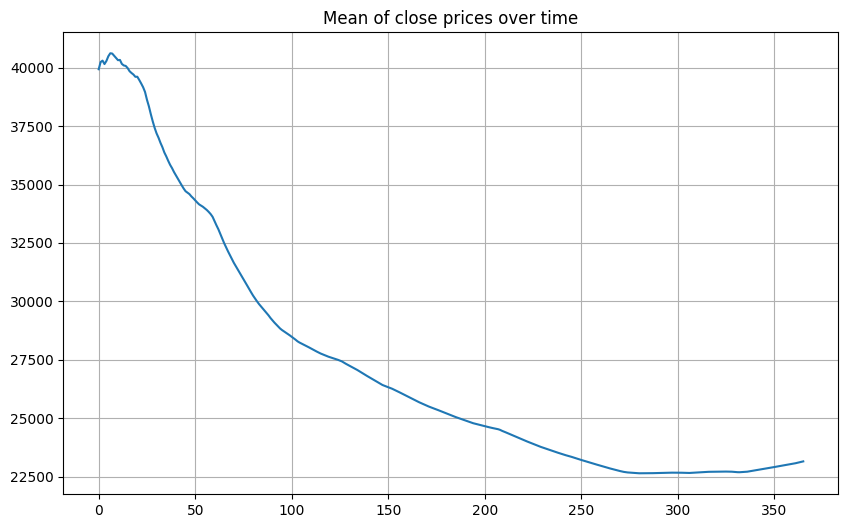

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(means)
plt.grid()
plt.title("Mean of close prices over time")
plt.show()